In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from sklearn.datasets import load_digits
myNums = load_digits()

In [3]:
dir(myNums)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [6]:
myNums.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [13]:
myNums.target

array([0, 1, 2, ..., 8, 9, 8])

In [7]:
myNums.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

<Figure size 432x288 with 0 Axes>

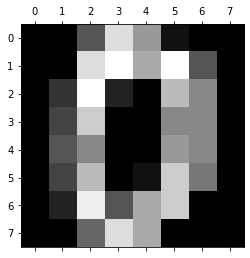

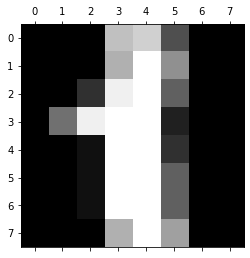

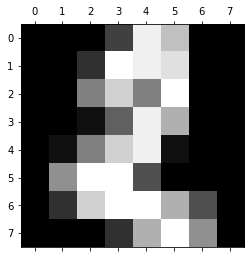

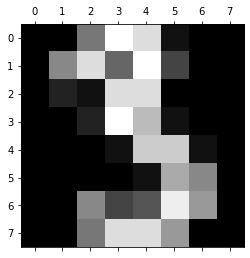

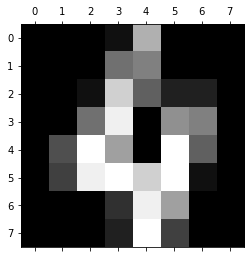

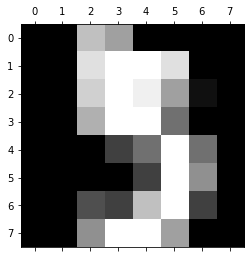

In [9]:
plt.gray()
for i in range(6):
    plt.matshow(myNums.images[i])

In [14]:
a = myNums.data
b = myNums.target

In [23]:
from sklearn.model_selection import train_test_split
a_train, a_test, b_train, b_test = train_test_split(a,b,test_size=0.2)

In [24]:
print("Size of training data set: ",len(a_train))
print("Size of testing data set: ",len(a_test))

Size of training data set:  1437
Size of testing data set:  360


In [25]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier() #We can also pass arguments in paranthesis to tune our model i.e."n_estimators", "criterion" -
#etc. "n_estimators" are number of trees, default is 100. "criterion" could gini or entropy, default is gini 

In [26]:
model.fit(a_train,b_train)

RandomForestClassifier()

In [27]:
model.score(a_test,b_test)

0.975

In [30]:
model.predict(myNums.data[0:5])

array([0, 1, 2, 3, 4])

In [31]:
myNums.target[0:5]

array([0, 1, 2, 3, 4])

As you can see above two cells that my model is predicting right from index 0 to 5

Lets see the performance of our model. we will attain this by drawing a confusion matrix.

In [28]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict(a_test)
cm = confusion_matrix(b_test, y_pred)
cm

array([[36,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 32,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 40,  0,  0,  0,  0,  0,  1,  0],
       [ 0,  0,  0, 32,  0,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0, 32,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 39,  1,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  0, 34,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 44,  0,  0],
       [ 0,  2,  0,  0,  0,  0,  0,  0, 26,  0],
       [ 0,  0,  0,  1,  0,  0,  0,  0,  1, 36]], dtype=int64)

Text(69.0, 0.5, 'Actual')

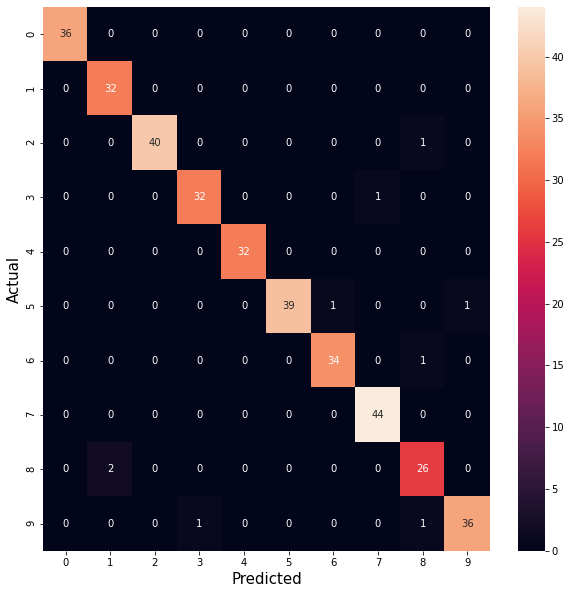

In [29]:
plt.figure(figsize=(10,10))
sns.heatmap(cm,annot=True)
plt.xlabel("Predicted",fontsize=15)
plt.ylabel("Actual",fontsize=15)